In [1]:
#---------Importing Libraries---------------------------------------


import os
import cv2
from matplotlib import pyplot as plt

In [2]:
modelFile = 'res10_300x300_ssd_iter_140000.caffemodel' # This file contains the learned weights
architectureInfo = 'deploy.prototxt' # This file defines the architecture like the layers and the parameters

# Loading the Pretrained Model
model = cv2.dnn.readNetFromCaffe(architectureInfo, modelFile)

In [3]:
image_path = 'image1.jpg'
image = cv2.imread(image_path)

In [4]:
# image.shape returns 3 values---> [Height, Width and Mode] --->We require only Height and Width

print(f'Output of image.shape: {image.shape}')
print(f'Height and Width of Image: {image.shape[:-1]}')

Output of image.shape: (320, 612, 3)
Height and Width of Image: (320, 612)


In [5]:
(height, width) = image.shape[:-1]

In [6]:
# === Preprocess the image: convert to blob ===
# The face detector was trained on 300x300 pixel inputs, so we must resize
# Mean subtraction values (104.0, 177.0, 123.0) are the BGR channel-wise means 
# used during training — essential to match the training distribution.
blob = cv2.dnn.blobFromImage(
    cv2.resize(image, (300, 300)),  # Resize input to model's expected size
    scalefactor=1.0,              # No scaling of pixel values (keep them as-is)
    size=(300, 300),              # Target size (matches training input shape)
    mean=(104.0, 177.0, 123.0),   # Channel-wise BGR means for normalization
    swapRB=False,                 # No channel swapping (model expects BGR)
    crop=False                    # Do not crop — just resize directly
)

In [7]:
# Pass the blob to the network
model.setInput(blob)

In [8]:
# Forward pass — compute detections
detections = model.forward()  # Shape: [1, 1, N, 7], where N is number of detections

In [9]:
detections.shape

(1, 1, 200, 7)

In [10]:
# === Iterate through all detections ===
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]  # Confidence score (probability it's a face)

    # Filter out low-confidence detections
    if confidence > 0.5:
        # Bounding box coordinates (normalized between 0 and 1), so rescale
        box = detections[0, 0, i, 3:7] * [width, height, width, height]  # scale to original image size
        (x1, y1, x2, y2) = box.astype("int")

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Draw confidence score above the box
        text = f"{confidence:.2f}"  # Format as percentage
        y_label = y1 - 10 if y1 - 10 > 10 else y1 + 10  # avoid label going off-frame
        cv2.putText(image, text, (x1, y_label), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 255, 0), 2)

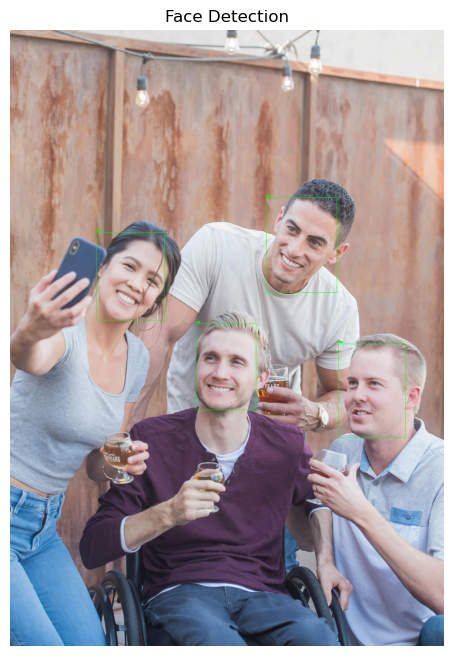

In [106]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis ticks
plt.title("Face Detection")
plt.show()